<a href="https://colab.research.google.com/github/tetrukavi/machine_learning_bgu/blob/main/205419377_316157379.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Avi Tetruk - 205419377
2.   Avichai Edri - 316157379

## URL for the Colab notebook:
https://colab.research.google.com/drive/1DdFz6owO8eXFRj7rvcNCHiFAj0YANWLI?usp=sharing

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Use Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN


from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%pip install kneed
from kneed import KneeLocator
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score, fowlkes_mallows_score
from sklearn.mixture import GaussianMixture
%pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Prepare Kaggle Load
Navigate to https://www.kaggle.com. Then go to the Account tab of your user profile and under settings find "API" and then click **Create New Token**. This will trigger the download of kaggle.json, a file containing your API credentials.
Then run the cell below and click the upload button to upload kaggle.json to your Colab runtime.

* If you don't use Colab, save the files locally using relative paths.


In [ ]:
from google.colab import files

# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


After uploading the kaggle.json select the data to upload (costumers segmentation in this example). The dataset will be copy to the enviroment in the '/content' directory. You will see the 'Retail.xlsx'.
For more about the dataset you can read [here](https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset/data).

In [ ]:
# download the dataset
!kaggle datasets download -d yasserh/customer-segmentation-dataset

# extract the files
!unzip '/content/customer-segmentation-dataset.zip'

Dataset URL: https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset
License(s): CC0-1.0
 41% 9.00M/21.8M [00:00<00:00, 42.0MB/s]
100% 21.8M/21.8M [00:00<00:00, 84.6MB/s]
Archive:  /content/customer-segmentation-dataset.zip
  inflating: Online Retail.xlsx      


**Use "customer_segmentation.csv" dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving customer_segmentation.csv to customer_segmentation.csv


## 1. Visualization (9 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

Excel file can be loaded using pandas like this:
`df = pd.read_excel('/content/Online Retail.xlsx')`

*   You will get 2 points for the graph and 1 for the insight.

In [ ]:
# load the data
df = pd.read_csv('customer_segmentation.csv')
print(df.head()) # verify the data set in first glimpse


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

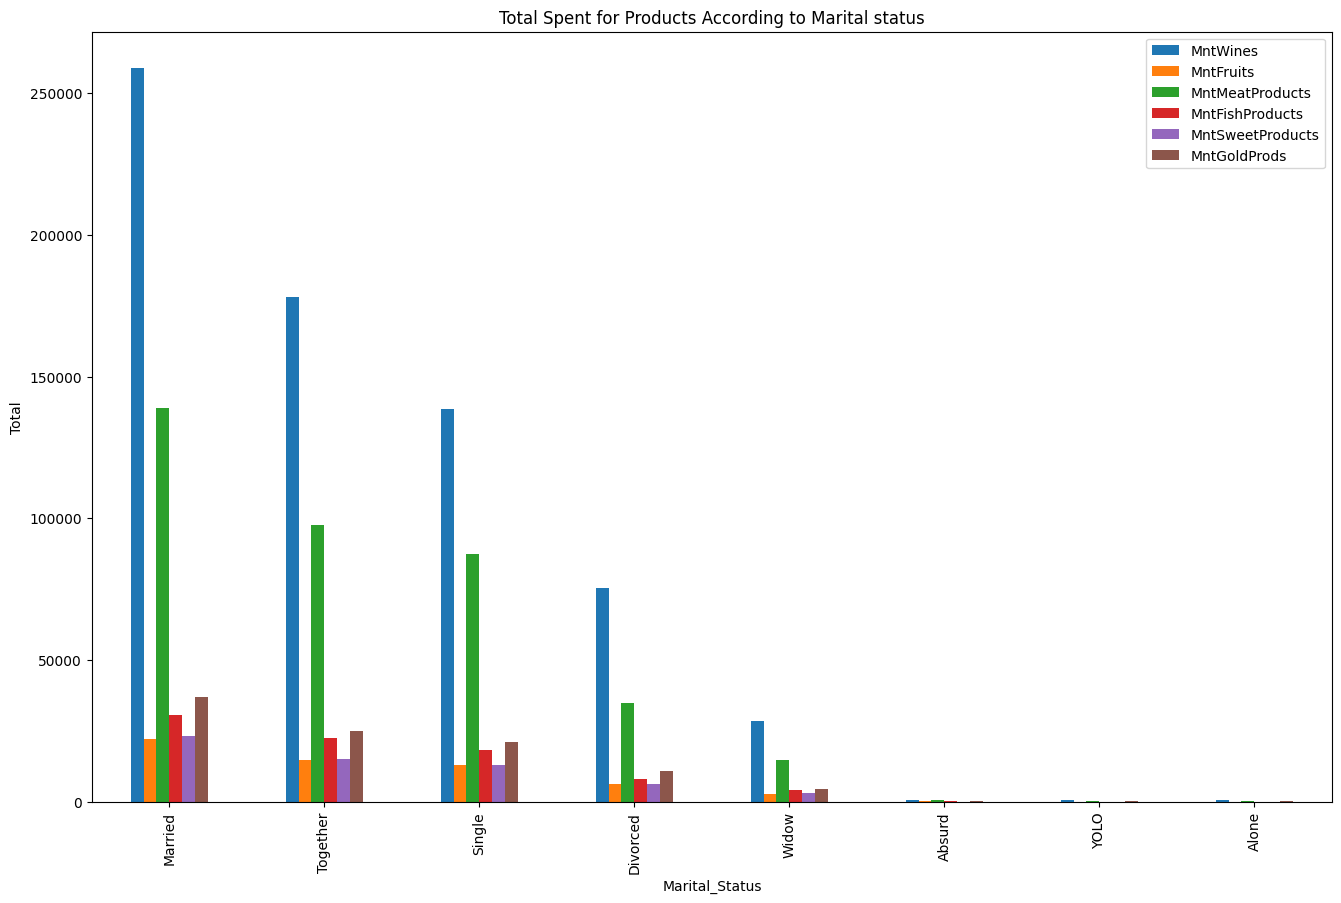

Percentage of total spending on wine: 50.17%
Percentage of total spending on meat products: 27.56%


In [ ]:
# Graph 1 -


total_spent_graph = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", 'Marital_Status']].groupby(["Marital_Status"]).sum().reset_index().sort_values(by=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"], ascending=False)
total_spent_graph.plot(x="Marital_Status", ylabel= "Total", kind="bar", figsize=(16, 10), legend=True, title="Total Spent for Products According to Marital status")
plt.show()

total_spent = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sum()
total_meat_spent = df['MntMeatProducts'].sum()
total_wine_spent = df['MntWines'].sum()

meat_percentage = (total_meat_spent / total_spent) * 100
wine_percentage = (total_wine_spent / total_spent) * 100

print(f"Percentage of total spending on wine: {wine_percentage:.2f}%")
print(f"Percentage of total spending on meat products: {meat_percentage:.2f}%")



**Insight** -

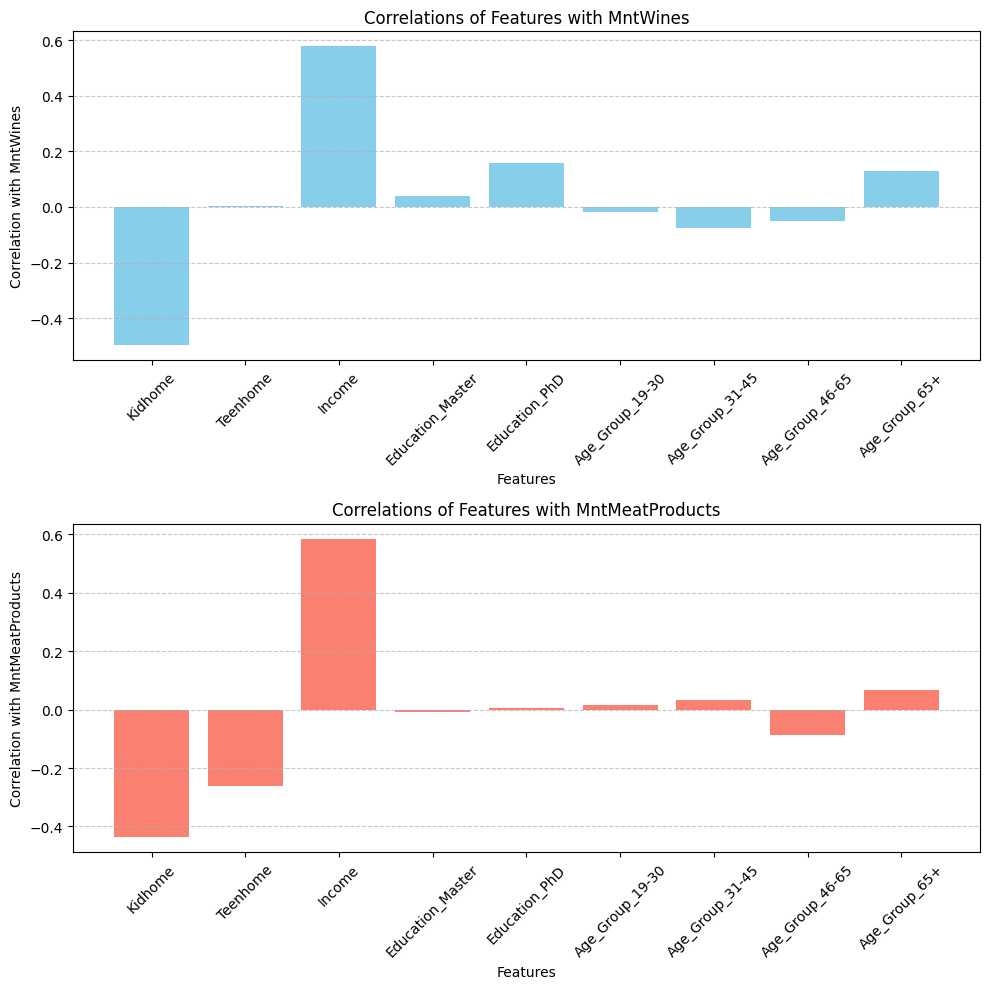

In [ ]:
# Graph 2 -


current_year = 2024
df['Age'] = current_year - df['Year_Birth']

# Convert the categorical 'Education' column to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Education'], drop_first=True)


# Define age bins and labels
age_bins = [0, 18, 30, 45, 65, float('inf')]
age_labels = ['0-18', '19-30', '31-45', '46-65', '65+']

# Convert Age column to categorical age groups
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


# Drop the original 'Age' column if no longer needed
df.drop(columns=['Age'], inplace=True)

df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)



# Calculate the correlations with MntWines
corr_wines = df[['Kidhome', 'Teenhome', 'Income', 'Education_Master', 'Education_PhD', 'Age_Group_19-30','Age_Group_31-45','Age_Group_46-65','Age_Group_65+', 'MntWines']].corr()['MntWines']

# Calculate the correlations with MntMeatProducts
corr_meat = df[['Kidhome', 'Teenhome', 'Income', 'Education_Master', 'Education_PhD', 'Age_Group_19-30','Age_Group_31-45','Age_Group_46-65','Age_Group_65+', 'MntMeatProducts']].corr()['MntMeatProducts']

# Define features and their correlations
features_wines = ['Kidhome', 'Teenhome', 'Income', 'Education_Master', 'Education_PhD', 'Age_Group_19-30', 'Age_Group_31-45', 'Age_Group_46-65', 'Age_Group_65+']
correlations_wines = corr_wines[:-1]  # Exclude the target variable "MntWines"

features_meat = ['Kidhome', 'Teenhome', 'Income', 'Education_Master', 'Education_PhD', 'Age_Group_19-30', 'Age_Group_31-45', 'Age_Group_46-65', 'Age_Group_65+']
correlations_meat = corr_meat[:-1]  # Exclude the target variable "MntMeatProducts"

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot correlations with MntWines
ax1.bar(features_wines, correlations_wines, color='skyblue')
ax1.set_xlabel('Features')
ax1.set_ylabel('Correlation with MntWines')
ax1.set_title('Correlations of Features with MntWines')
ax1.set_xticks(features_wines)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot correlations with MntMeatProducts
ax2.bar(features_meat, correlations_meat, color='salmon')
ax2.set_xlabel('Features')
ax2.set_ylabel('Correlation with MntMeatProducts')
ax2.set_title('Correlations of Features with MntMeatProducts')
ax2.set_xticks(features_meat)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()


**Insight** -

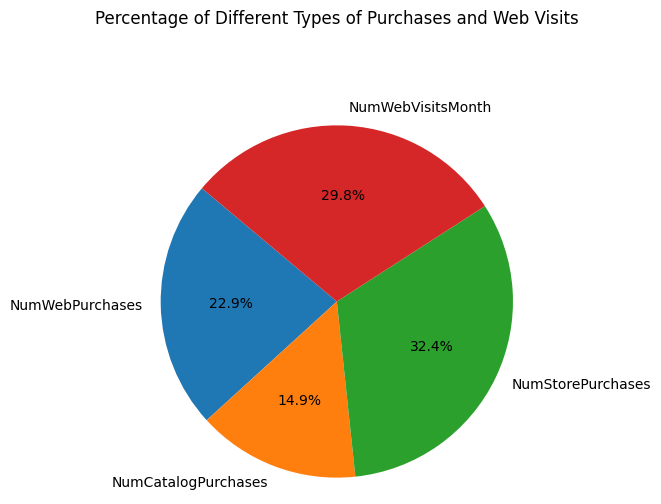

In [ ]:
# Graph 3 -

total_counts = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum()

# Plotting
plt.figure(figsize=(5, 5))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140,labeldistance=1.1)
plt.title('Percentage of Different Types of Purchases and Web Visits',y=1.2)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**Insight** -

## 2. KMEANS (20 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (1 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (4 points).
*   Visualize the clusters (3 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (5 points).
*   Visualize the methods (4 points).










In [ ]:
# load the data
df = pd.read_csv('customer_segmentation.csv')


In [ ]:
# Scale the data using MinMaxScaler
df = df.drop(columns=['ID'])
df = df.drop(columns=['Z_CostContact'])
df = df.drop(columns=['Z_Revenue'])



numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the numerical columns
df_scaled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original data
df_scaled[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Encode categorical variables 'Marital_Status' and 'Education' using one-hot encoding
df_encoded = pd.get_dummies(df_scaled, columns=['Marital_Status','Education'])

#Extract the month and year from the date column:
df_encoded['Dt_Customer'] = pd.to_datetime(df_encoded['Dt_Customer'], format='%d-%m-%Y')
df_encoded['Month'] = df_encoded['Dt_Customer'].dt.month
df_encoded['Year'] = df_encoded['Dt_Customer'].dt.year

# Drop old date column
df_encoded.drop(columns=['Dt_Customer'], inplace=True)

# Scale the new encoded columns
df_encoded[['Year', 'Month']] = scaler.fit_transform(df_encoded[['Month','Year']])

# Remove the rows that contains NULL values
df_encoded = df_encoded.dropna()


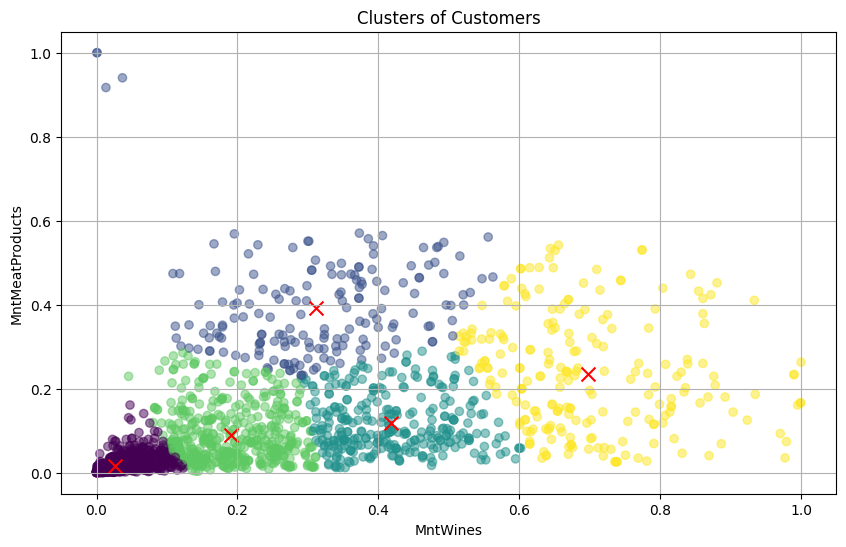

In [ ]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts'
features = df_encoded[['MntWines', 'MntMeatProducts']]

# Initialize KMeans clustering with 5 clusters and a fixed random state (42) for reproducibility
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans.fit(features)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features['MntWines'], features['MntMeatProducts'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100)  # Plot cluster centers
plt.xlabel('MntWines')
plt.ylabel('MntMeatProducts')
plt.title('Clusters of Customers')
plt.grid(True)
plt.show()



### Elbow

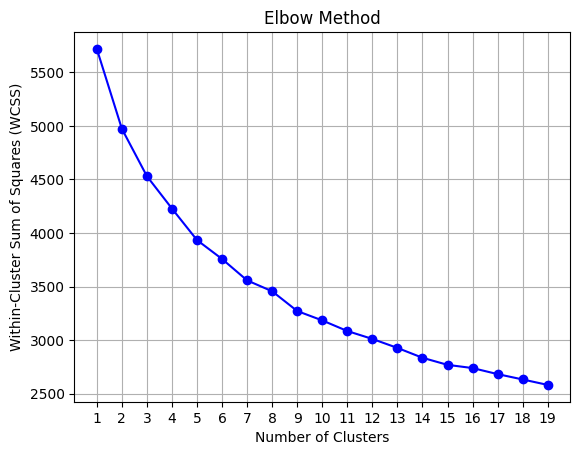

In [ ]:
def elbow_method(df_encoded):
  wcss = []
  # Determine the optimal number of clusters using the Elbow method
  for i in range(1, 20):  # Try different numbers of clusters from 1 to 20
      kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
      kmeans.fit(df_encoded)
      wcss.append(kmeans.inertia_)  # Append the WCSS value to the list

  # Plot the Elbow curve
  plt.plot(range(1, 20), wcss, marker='o', linestyle='-', color='b')
  plt.title('Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
  plt.xticks(range(1, 20))
  plt.grid(True)
  plt.show()
  return wcss

wcss = elbow_method(df_encoded)

### Silhouette Score

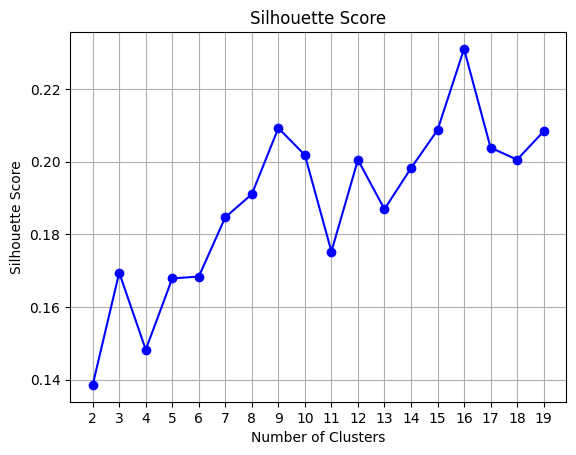

In [ ]:
def silhouette_method(df_encoded):
  silhouette_scores = []
  # Determine the Silhouette Score for different numbers of clusters
  for i in range(2, 20):  # Try different numbers of clusters from 2 to 20
      kmeans = KMeans(n_clusters=i, random_state=42,n_init=10)
      cluster_labels = kmeans.fit_predict(df_encoded)
      silhouette_avg = silhouette_score(df_encoded, cluster_labels)
      silhouette_scores.append(silhouette_avg)  # Append the Silhouette Score to the list

  # Plot the Silhouette Scores
  plt.plot(range(2, 20), silhouette_scores, marker='o', linestyle='-', color='b')
  plt.title('Silhouette Score')
  plt.xlabel('Number of Clusters')
  plt.ylabel('Silhouette Score')
  plt.xticks(range(2, 20))
  plt.grid(True)
  plt.show()
  return silhouette_scores

silhouette_scores = silhouette_method(df_encoded)


## 3. PCA (8 points)
In this exercise, you will use PCA:
*   With n_components = 2 (3 points).
*   Visualize the PCA (2 points).
*   Find the variance explined in this PCA (3 points).





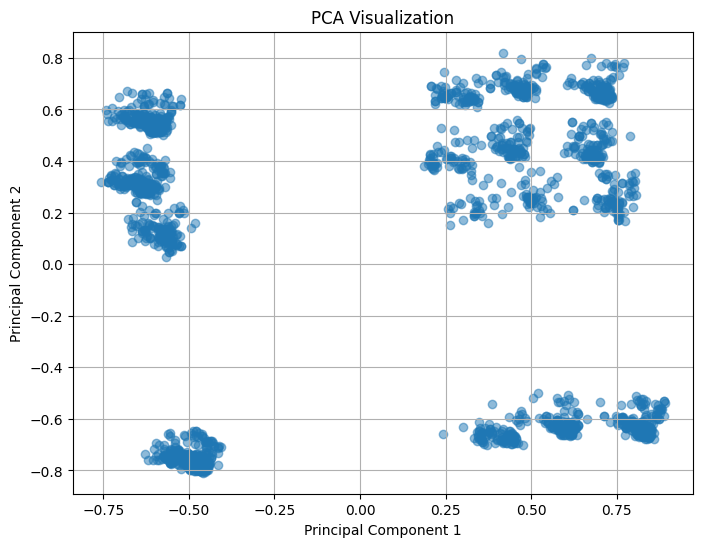

Variance explained by PC1: 0.13418007487228487
Variance explained by PC2: 0.12650665055836427


In [ ]:
# Adjust n_components as needed
pca = PCA(n_components=2)


# Create a DataFrame with the principal components
pca_features = pca.fit_transform(df_encoded)



# Plotting the PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Display explained variance

explained_variance_ratio = pca.explained_variance_ratio_
print("Variance explained by PC1:", explained_variance_ratio[0])
print("Variance explained by PC2:", explained_variance_ratio[1])


**Q**: What is the variance explained in the 2 component PCA?

**A**:Variance explained by PC1: 0.13418007487225359
      Variance explained by PC2: 0.12650665055819413

      Explained variance is a statistical measure of how much variation in a dataset can be attributed to each of the principal components (eigenvectors) generated by the principal component analysis (PCA) method. In other words, it tells us how much of the total variance is “explained” by each component. This is important because it allows us to rank the components in order of importance, and to focus on the most important ones when interpreting the results of our analysis.

## 4. PCA & Kmeans (11 points)
This time, we will use the PCA computed output for the kmeans model.
*   Run PCA with n_components = 2 (1 points)
*   Find the best k for kmeans (4 points)
*   Plot the best clusters (3 points)
*   Answer the question (What question?) (3 points)





In [ ]:
pca = PCA(n_components=2)


# Create a DataFrame with the principal components
pca_features = pca.fit_transform(df_encoded)

### Elbow

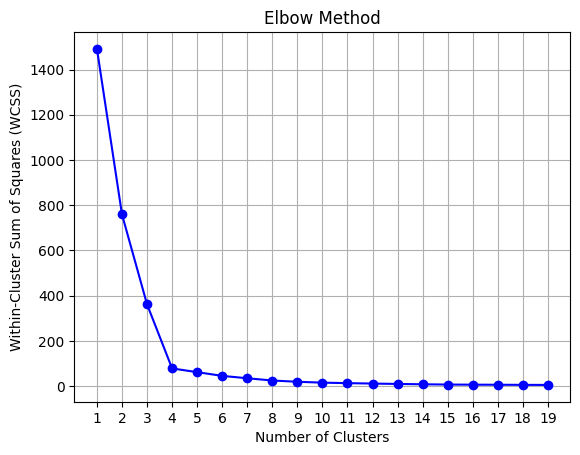

The optimal number of clusters is: 4


In [ ]:
wcss = elbow_method(pca_features)


# Find the optimal number of clusters using the Kneedle algorithm
kneedle = KneeLocator(range(1, 20), wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.elbow

print(f'The optimal number of clusters is: {optimal_k}')

### Silhouette

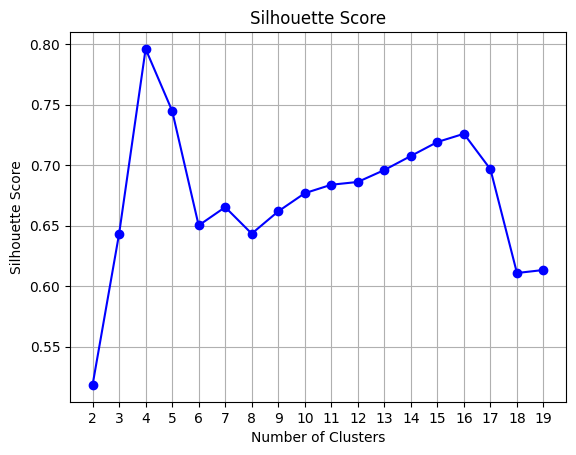

In [ ]:

silhouette_scores = silhouette_method(pca_features)


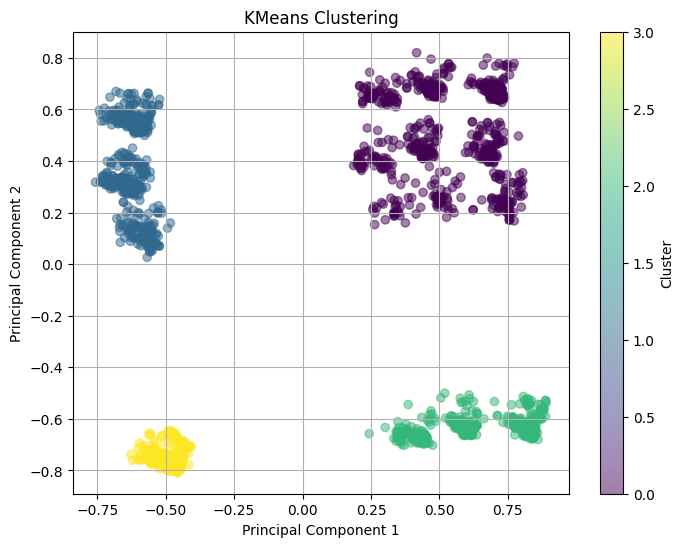

In [ ]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42,n_init=10)
kmeans.fit(pca_features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()



```
# This is formatted as code
```



**Q**: In our human eye, it's looks like we need 5 clusters. But both methods return 2. Why do you think kmeans returning 2 and not 5?

**A**: This Q was a mistake (https://moodle.bgu.ac.il/moodle/mod/forum/discuss.php?d=722656.

"it is still required to give a reason why in some cases there might be differences between the methods and what we expect visually":


*   Point can be subjective and sometimes hard to identify if the curve is smooth without a clear bend (Elbow)
*   May not clearly indicate a single optimal number of clusters if there are multiple peaks (Silhouette)
* Differences can arise due to data characteristics, cluster shapes, densities, and the presence of noise



## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











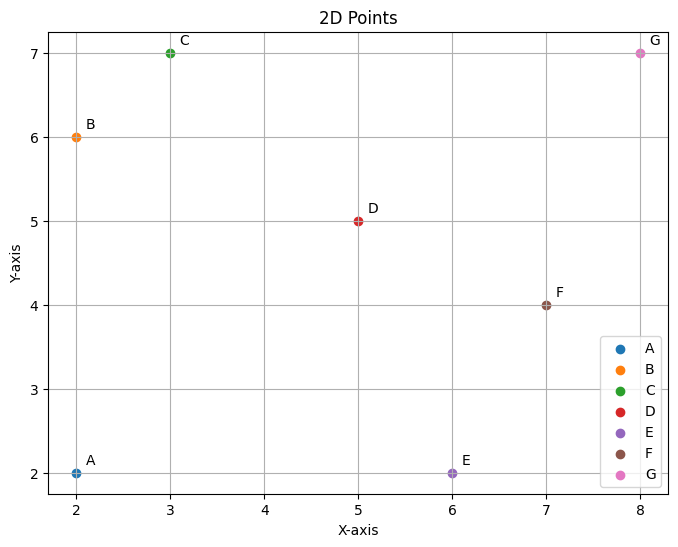

In [ ]:
import matplotlib.pyplot as plt

# Points coordinates
points = {
    'A': (2, 2),
    'B': (2, 6),
    'C': (3, 7),
    'D': (5, 5),
    'E': (6, 2),
    'F': (7, 4),
    'G': (8, 7)
}

# Plotting the points
plt.figure(figsize=(8, 6))
for point, coord in points.items():
    plt.scatter(coord[0], coord[1], label=point)
    plt.text(coord[0]+0.1, coord[1]+0.1, point)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Points')
plt.legend()
plt.grid(True)
plt.show()

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






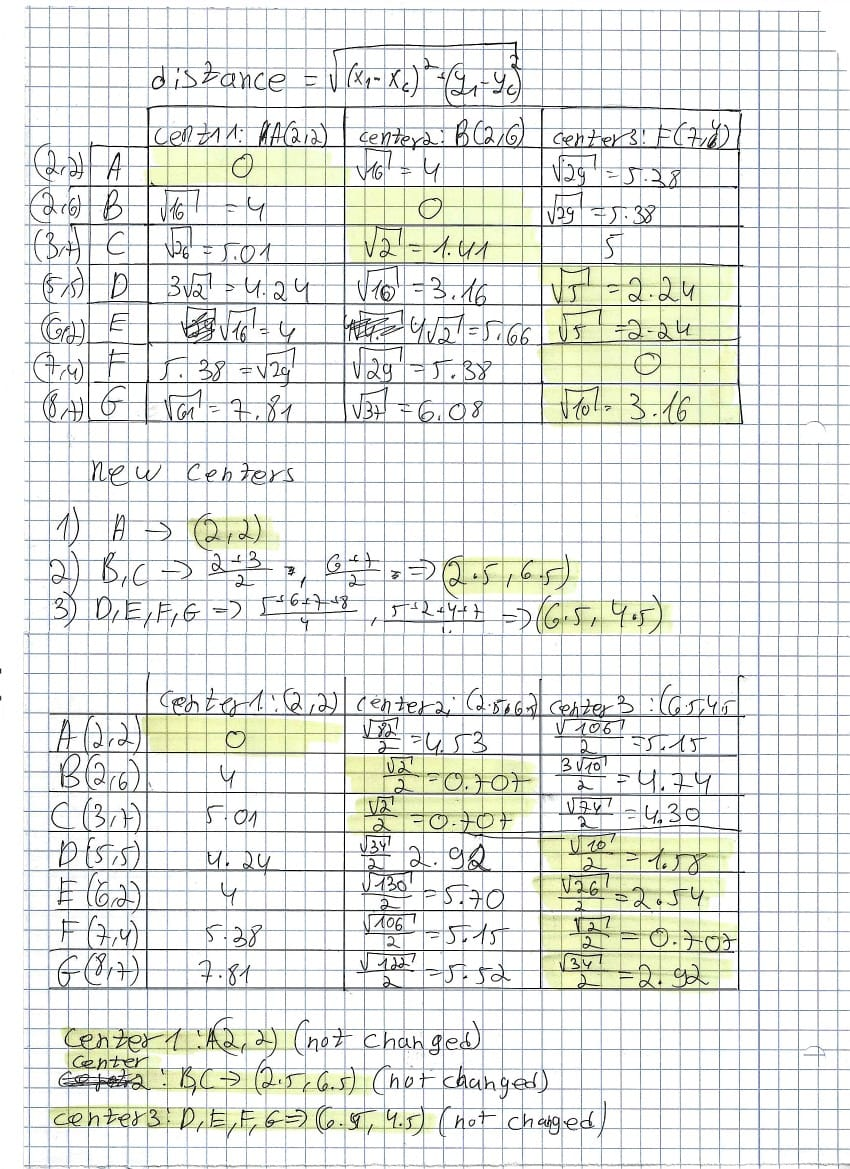

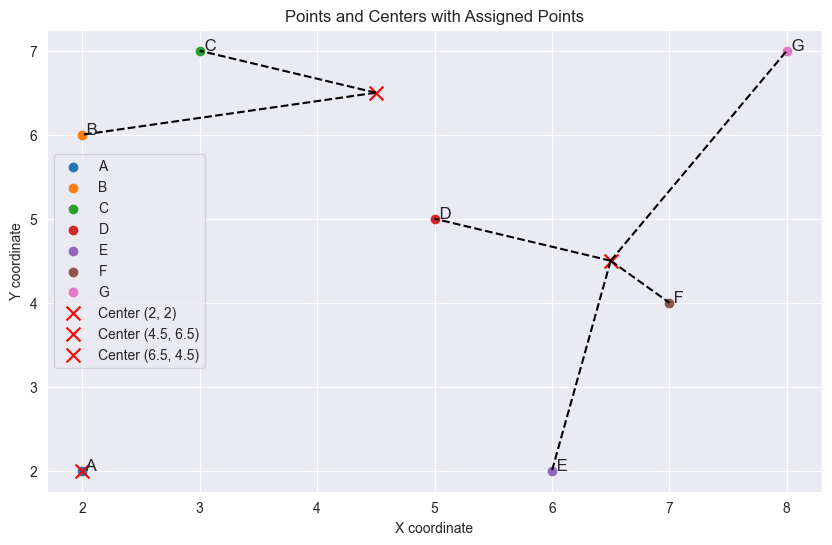

In [ ]:
# Points and centers
points = {
    'A': (2, 2),
    'B': (2, 6),
    'C': (3, 7),
    'D': (5, 5),
    'E': (6, 2),
    'F': (7, 4),
    'G': (8, 7)
}
centers = {
    (2, 2): ['A'],
    (4.5, 6.5): ['B', 'C'],
    (6.5, 4.5): ['D', 'E', 'F', 'G']
}

# Plotting the points and centers
plt.figure(figsize=(10, 6))

# Plot points
for point, coord in points.items():
    plt.scatter(*coord, label=point)
    plt.text(coord[0], coord[1], f' {point}', fontsize=12)

# Plot centers and their assigned points
for center, assigned_points in centers.items():
    plt.scatter(*center, color='red', marker='x', s=100, label=f'Center {center}')
    for point in assigned_points:
        point_coord = points[point]
        plt.plot([center[0], point_coord[0]], [center[1], point_coord[1]], 'k--')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Points and Centers with Assigned Points')
plt.legend()
plt.grid(True)
plt.show()

2. Choosing other points as centers can affect the result, because the kmeans algorithm finds the best point from the starting point, and it is possible that another choice will find other better centers
3.

* Customer segmentation - according to their demographics or their consumer behaviors, in order to bring better products and services to customers
*   Anomaly Detection- identifying anomalies in businesses: businesses suspected of criminal activity, identifying problematic customers according to consumer behavior
* Healthcare - identification of potential patients, possible treatment or outbreak of diseases according to similar characteristics




## 6. Find 3 datasets online (from kaggle, UCI, etc.) with more than 10 features and include labels - add links to datasets. (37 points)

a. Use PCA and TSNE (two different methods) with 2 components each and show the data with their labels (for each of the 3 data sets). 10 points

b. Use 3 different clustering methods for each dataset and show plots. Explain which had best results when comparing to labels and why. 12 points

c. Explain some of the differences between PCA and TSNE, while addressing the addition of data to the dataset in each. 8 points

d. Run datasets with LDA and show plot, how did this method effect results and why? 7 points


In [ ]:
#2 components
def plot_PCA_TSNE(data,data_name,labels):
  # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data)
  # TSNE
    tsne = TSNE(n_components=2)
    tsne_result = tsne.fit_transform(data)
  #plot the resuts in the same graph
  #the class labels are the key for the colors
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.scatter(pca_result[:,0], pca_result[:,1],alpha=0.5,c=labels)
    plt.title(f'PCA - {data_name}')
    plt.subplot(1,2,2)
    plt.scatter(tsne_result[:,0], tsne_result[:,1],alpha=0.5,c=labels )
    plt.title(f'TSNE - {data_name}')
    plt.show()
    return pca_result,tsne_result

In [ ]:



#Use 3 different clustering methods for each dataset and show plots
# Explain which had best results when comparing to labels and why.
def plot_clusters(data,data_name,labels,num_clusters):
  #tha data is already scaled
    # KMeans
    kmeans = KMeans(n_clusters=num_clusters,n_init=10)
    kmeans_result = kmeans.fit_predict(data)
    # Agglomerative Clustering
    agg = AgglomerativeClustering(n_clusters=num_clusters)
    agg_result = agg.fit_predict(data)
    # GaussianMixture
    gm = GaussianMixture(n_components=num_clusters, random_state=42)
    gm_result = gm.fit_predict(data)
    #plot the resuts in the same graph
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.scatter(data[:,0], data[:,1],alpha=0.5,c=kmeans_result)
    plt.title(f'KMeans - {data_name}')
    plt.subplot(1,3,2)
    plt.scatter(data[:,0], data[:,1],alpha=0.5,c=agg_result)
    plt.title(f'Agglomerative Clustering - {data_name}')
    plt.subplot(1,3,3)
    plt.scatter(data[:,0], data[:,1],alpha=0.5,c=gm_result)
    plt.title(f'GaussianMixture - {data_name}')
    plt.show()

    evaluation_metrics = {
        'KMeans': {
            'ARI': adjusted_rand_score(labels, kmeans_result),
            'NMI': normalized_mutual_info_score(labels, kmeans_result),
            'AMI': adjusted_mutual_info_score(labels, kmeans_result),
            'FMI': fowlkes_mallows_score(labels, kmeans_result)
        },
        'Agglomerative': {
            'ARI': adjusted_rand_score(labels, agg_result),
            'NMI': normalized_mutual_info_score(labels, agg_result),
            'AMI': adjusted_mutual_info_score(labels, agg_result),
            'FMI': fowlkes_mallows_score(labels, agg_result)
        },
        'GaussianMixture': {
            'ARI': adjusted_rand_score(labels, gm_result),
            'NMI': normalized_mutual_info_score(labels, gm_result),
            'AMI': adjusted_mutual_info_score(labels, gm_result),
            'FMI': fowlkes_mallows_score(labels, gm_result)
        }
    }
    copmare_df = pd.DataFrame(evaluation_metrics)
    return copmare_df

 [wine datatset](https://archive.ics.uci.edu/dataset/109/wine) from uci

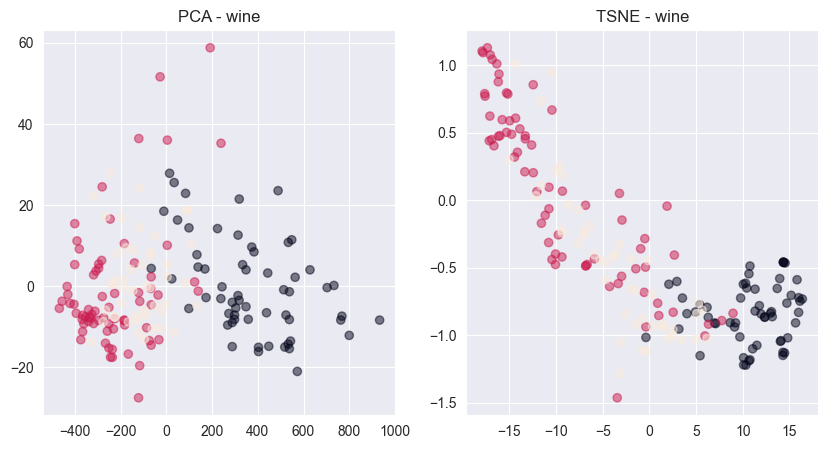

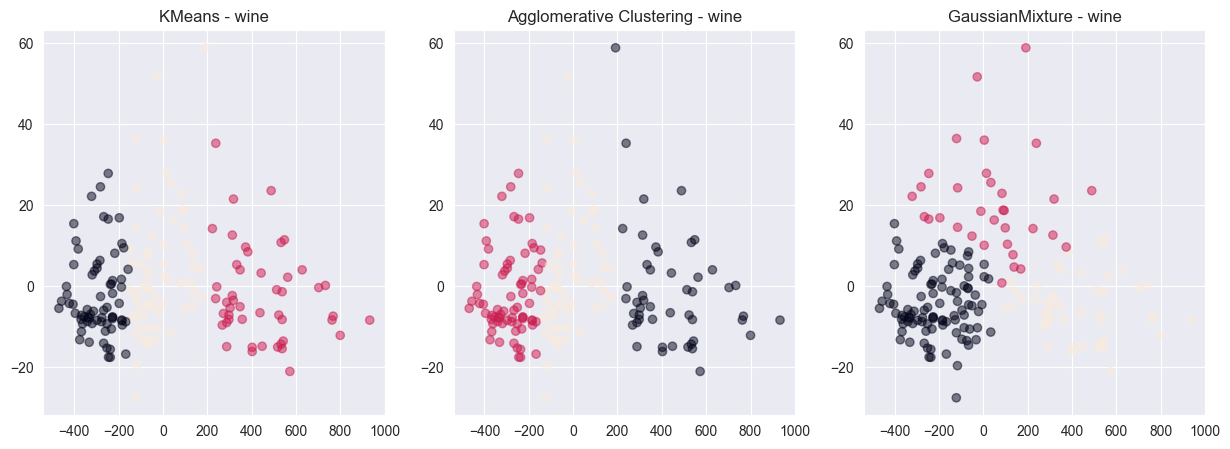

       KMeans  Agglomerative  GaussianMixture
ARI  0.371114       0.368402         0.370488
NMI  0.428757       0.416077         0.385259
AMI  0.422687       0.409868         0.378388
FMI  0.583537       0.582122         0.605616


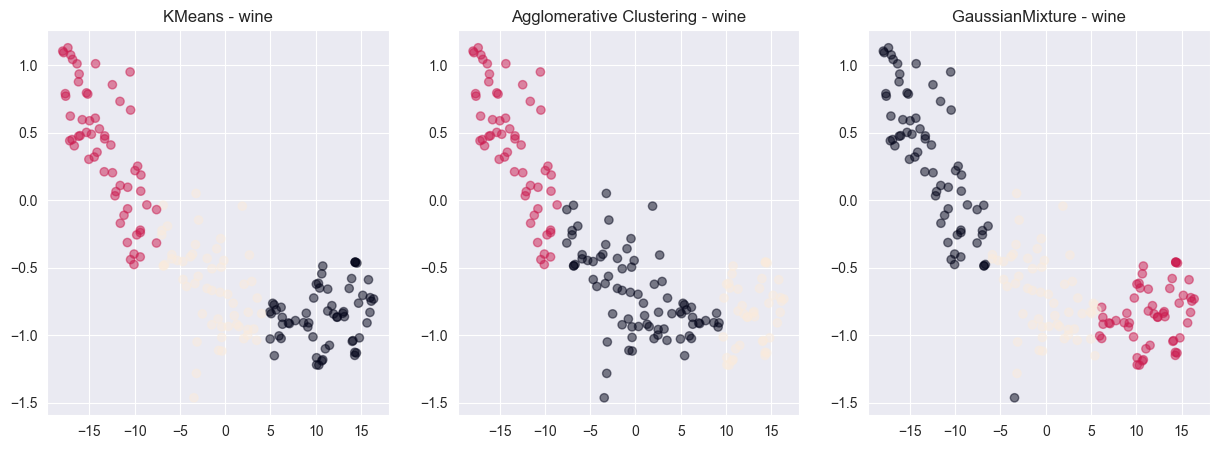

       KMeans  Agglomerative  GaussianMixture
ARI  0.391024       0.330520         0.407191
NMI  0.386218       0.428683         0.415655
AMI  0.379735       0.422559         0.409471
FMI  0.594416       0.560578         0.605892


In [ ]:

wine = fetch_ucirepo(id=109)

wine_data =wine.data.original
colors = {'1':'red', '2':'blue', '3':'green'}
train_wine = wine_data.drop('class',axis=1)
pca_result,tsne_result =plot_PCA_TSNE(train_wine,'wine',wine_data['class'])
print(plot_clusters(pca_result,'wine',wine_data['class'],3).head())
print(plot_clusters(tsne_result,'wine',wine_data['class'],3))


the Gaussian Mixture Model (GMM) with Principal Component Analysis (PCA) works the best because it flexibly captures the underlying distribution of the Wine dataset, accurately modeling clusters of varying shapes and sizes

#

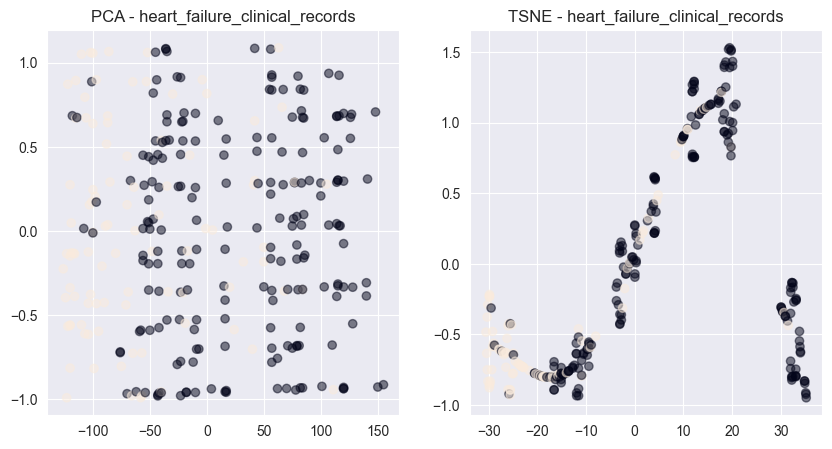

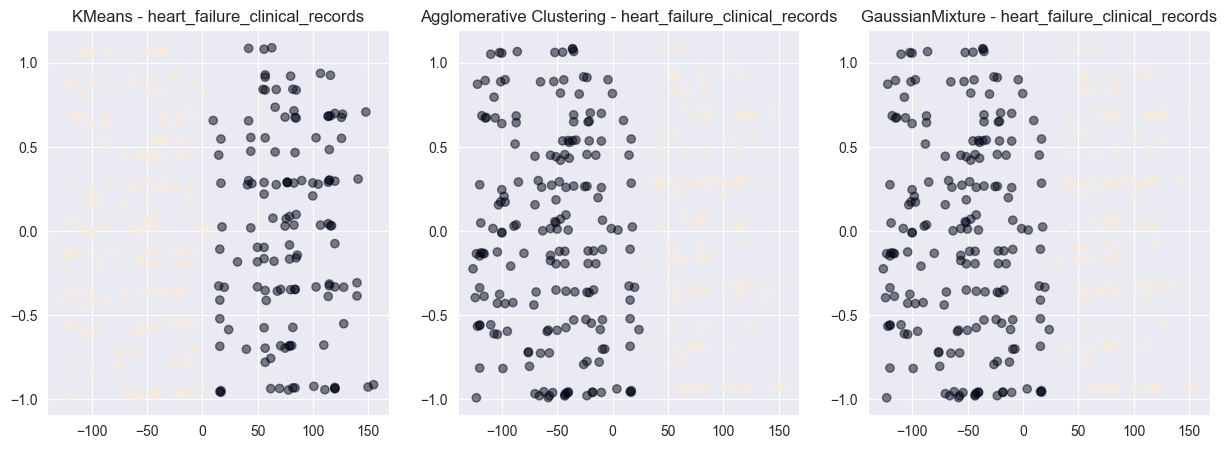

       KMeans  Agglomerative  GaussianMixture
ARI  0.088213       0.044454         0.044454
NMI  0.116109       0.098587         0.098587
AMI  0.113838       0.096239         0.096239
FMI  0.574809       0.563048         0.563048


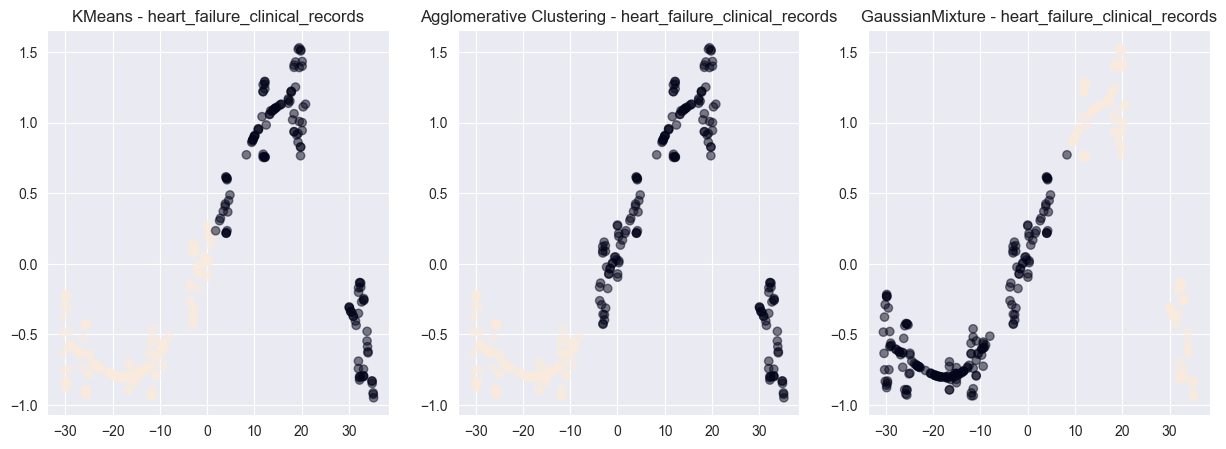

       KMeans  Agglomerative  GaussianMixture
ARI  0.084691       0.217875         0.047249
NMI  0.105174       0.159773         0.105671
AMI  0.102879       0.157608         0.103338
FMI  0.572066       0.636948         0.565078


In [ ]:
heart_failure_clinical_records = fetch_ucirepo(id=519)
heart_failure_clinical_records_data =heart_failure_clinical_records.data.original
lebels_num= heart_failure_clinical_records_data['death_event'].nunique()



train_heart_failure_clinical_records = heart_failure_clinical_records_data.drop('death_event',axis=1)
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Scaling only numerical columns
heart_scaler = MinMaxScaler()
train_heart_failure_clinical_records[numerical_columns] = heart_scaler.fit_transform(train_heart_failure_clinical_records[numerical_columns])

# If you want to keep the rest of the features unchanged
no_numeric_columns = [col for col in train_heart_failure_clinical_records.columns if col not in numerical_columns]
train_heart_failure_clinical_records[no_numeric_columns] = heart_failure_clinical_records_data[no_numeric_columns]


pca_result,tsne_result =plot_PCA_TSNE(train_heart_failure_clinical_records,'heart_failure_clinical_records',heart_failure_clinical_records_data['death_event'])
print(plot_clusters(pca_result,'heart_failure_clinical_records',heart_failure_clinical_records_data['death_event'],lebels_num).head())
print(plot_clusters(tsne_result,'heart_failure_clinical_records',heart_failure_clinical_records_data['death_event'],lebels_num).head())

In [ ]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
breast_cancer_wisconsin_diagnostic.data.original

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


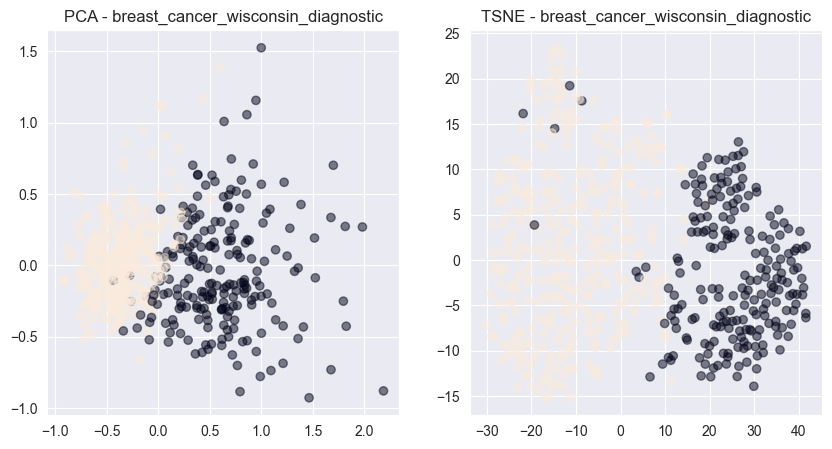

In [ ]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
breast_cancer_wisconsin_diagnostic_data =breast_cancer_wisconsin_diagnostic.data.original
lebels_num= breast_cancer_wisconsin_diagnostic_data['Diagnosis'].nunique()
#target to number
breast_cancer_wisconsin_diagnostic_data['Diagnosis'] = breast_cancer_wisconsin_diagnostic_data['Diagnosis'].map({'M':0,'B':1})
train_breast_cancer_wisconsin_diagnostic = breast_cancer_wisconsin_diagnostic_data.drop(['Diagnosis','ID'],axis=1)
heart_scaler = MinMaxScaler()
train_breast_cancer_wisconsin_diagnostic = heart_scaler.fit_transform(train_breast_cancer_wisconsin_diagnostic)
pca_result,tsne_result =plot_PCA_TSNE(train_breast_cancer_wisconsin_diagnostic,'breast_cancer_wisconsin_diagnostic',breast_cancer_wisconsin_diagnostic_data['Diagnosis'])



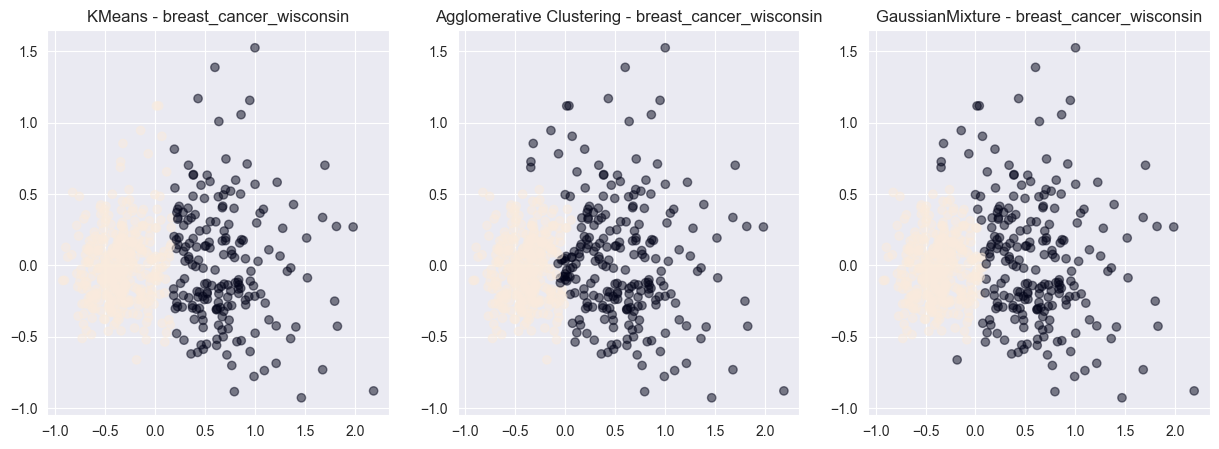

,KMeans,Agglomerative,GaussianMixture
ARI,0.730175,0.655211,0.689446
NMI,0.623086,0.548081,0.568829
AMI,0.622572,0.547485,0.568255
FMI,0.876994,0.835489,0.853756


In [ ]:
plot_clusters(pca_result,'breast_cancer_wisconsin',breast_cancer_wisconsin_diagnostic_data['Diagnosis'],2)


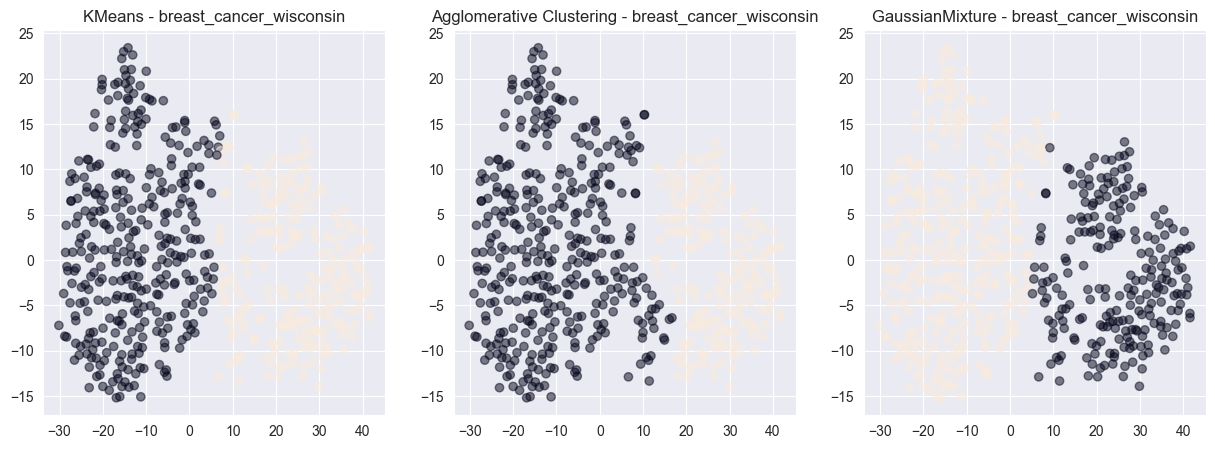

,KMeans,Agglomerative,GaussianMixture
ARI,0.768188,0.792184,0.793108
NMI,0.669874,0.698121,0.697500
AMI,0.669438,0.697710,0.697100
FMI,0.889778,0.905045,0.901765


In [ ]:
plot_clusters(tsne_result,'breast_cancer_wisconsin',breast_cancer_wisconsin_diagnostic_data['Diagnosis'],2)

###Explain some of the differences between PCA and TSNE, while addressing the addition of data to the dataset in each. 8 points

when adding

###Run datasets with LDA and show plot, how did this method effect results and why?

In [ ]:
def preporm_LDA(data,labels):
    lda = LinearDiscriminantAnalysis()
    lda_result = lda.fit_transform(data,labels)
    return lda_result

In [ ]:
def plot_LDA(data,data_name,labels):
    n_features = data.shape[1]
    n_classes = len(set(labels))
    max_components = min(n_features, n_classes - 1)

    lda = LinearDiscriminantAnalysis()
    lda_result = lda.fit_transform(data,labels)
    return lda_result

In [ ]:
def plot_LDA_only_1_component(data,data_name,labels):
    lda = LinearDiscriminantAnalysis()
    X_lda = lda.fit_transform(data, labels)
    return X_lda

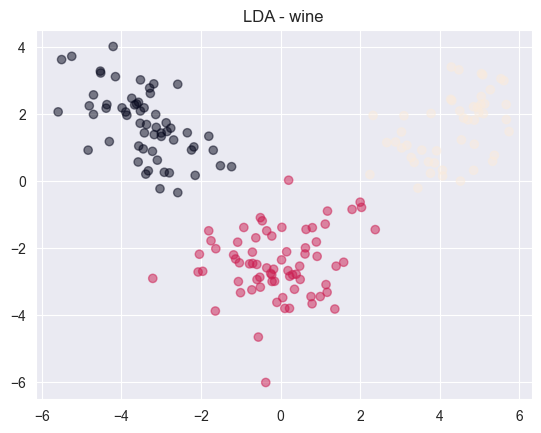

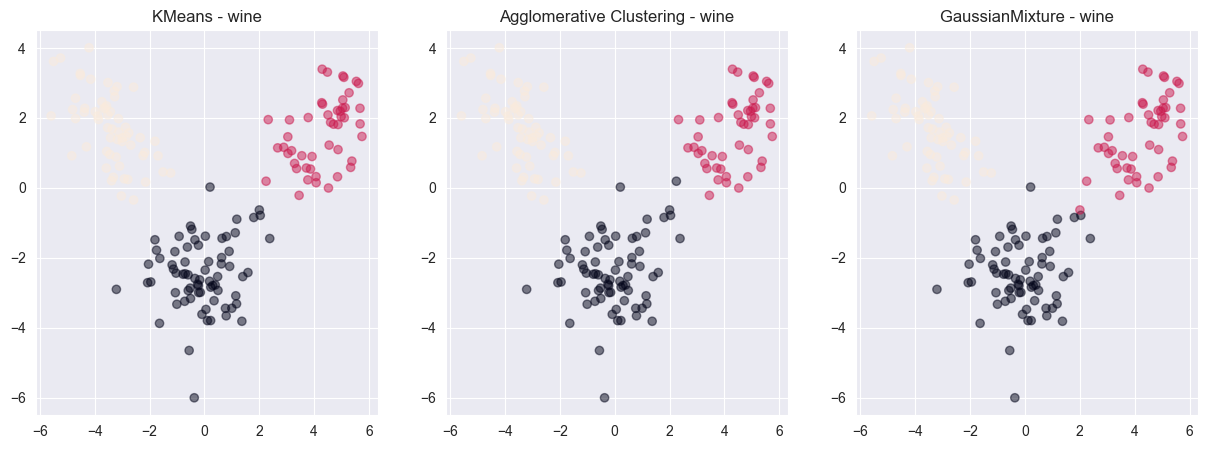

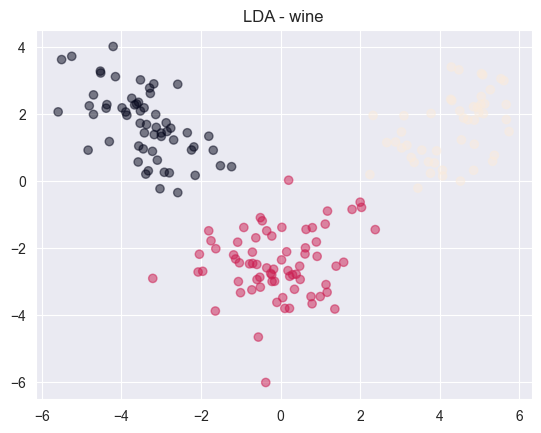

In [ ]:
lda_result_wine = plot_LDA(train_wine,'wine',wine_data['class'])
plot_clusters(lda_result_wine,'wine',wine_data['class'],3)

plt.scatter(lda_result_wine[:,0], lda_result_wine[:,1],alpha=0.5,c=wine_data['class'])
plt.title(f'LDA - wine')
plt.show()





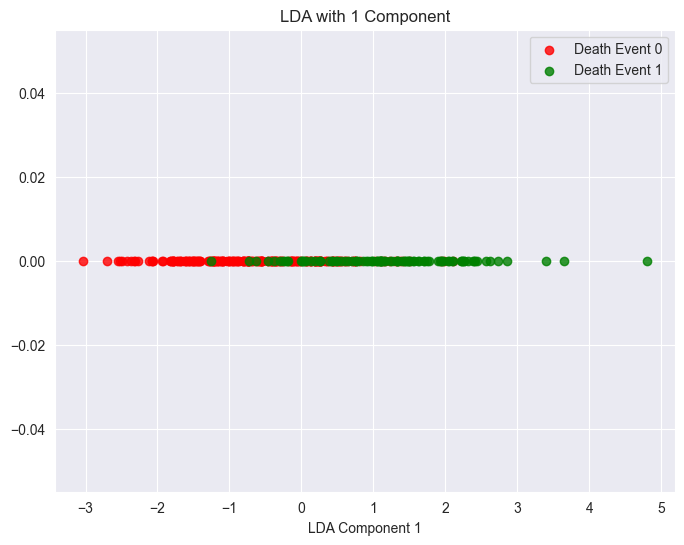

In [ ]:
heart_lda = LinearDiscriminantAnalysis(n_components=1)
heart_lda_result = heart_lda.fit_transform(train_heart_failure_clinical_records, heart_failure_clinical_records_data['death_event'])

# Plot LDA results
plt.figure(figsize=(8, 6))
heart_colors = ['r', 'g']
labels = [0, 1]  #  'death_event' has binary classes 0 and 1

for color, i in zip(colors, labels):
    plt.scatter(heart_lda_result[heart_failure_clinical_records_data['death_event'] == i, 0],
                np.zeros_like(heart_lda_result[heart_failure_clinical_records_data['death_event'] == i, 0]),
                alpha=0.8, color=color, label=f'Death Event {i}')

plt.xlabel('LDA Component 1')
plt.title('LDA with 1 Component')
plt.legend(loc='best')
plt.show()

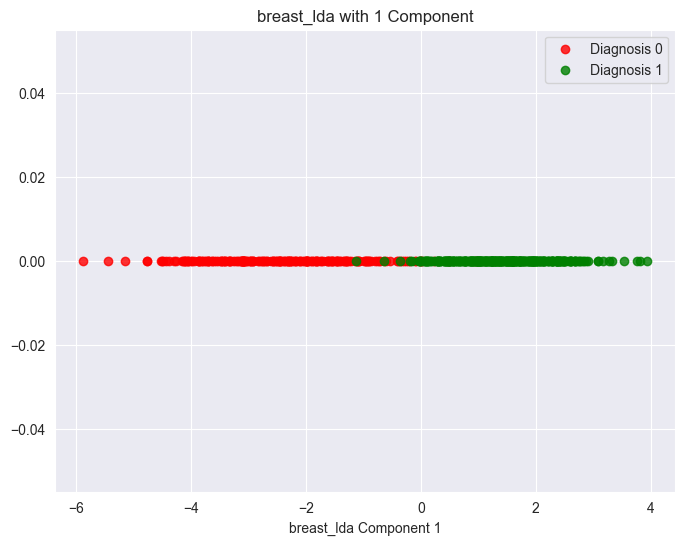

In [ ]:
breast_lda = LinearDiscriminantAnalysis(n_components=1)
breast_lda_result = breast_lda.fit_transform(train_breast_cancer_wisconsin_diagnostic, breast_cancer_wisconsin_diagnostic_data['Diagnosis'])
#plotiing the lda
plt.figure(figsize=(8, 6))
breast_colors = ['r', 'g']
labels = [0, 1]  #'Diagnosis' has binary classes 0 and 1
for breast_color, i in zip(colors, labels):
    plt.scatter(breast_lda_result[breast_cancer_wisconsin_diagnostic_data['Diagnosis'] == i, 0],
                np.zeros_like(breast_lda_result[breast_cancer_wisconsin_diagnostic_data['Diagnosis'] == i, 0]),
                alpha=0.8, color=breast_color, label=f'Diagnosis {i}')
plt.xlabel('breast_lda Component 1')
plt.title('breast_lda with 1 Component')
plt.legend(loc='best')
plt.show()


## 7. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

$\begin{pmatrix}
1 & 3
\end{pmatrix}$
*

$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$

=
$\begin{pmatrix}
7 & -2
\end{pmatrix}$


######################################################################

$\begin{pmatrix}
3 & 7
\end{pmatrix}$
*

$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$

=
$\begin{pmatrix}
17 & -4
\end{pmatrix}$

so by the correspoding egienvalues the projections are:
$\begin{pmatrix}
7
\end{pmatrix}$
and
$\begin{pmatrix}
17
\end{pmatrix}$

